In [1]:
# sklern se nahi hota hai random imputation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning Note\train (1).csv" , usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
df['age_imputed'] = df['Age']

In [5]:
df.tail()

,Survived,Age,Fare,age_imputed
886,0,27.0,13.00,27.0
887,1,19.0,30.00,19.0
888,0,NaN,23.45,NaN
889,1,26.0,30.00,26.0
890,0,32.0,7.75,32.0


In [6]:
df['age_imputed'][df['age_imputed'].isnull()]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: age_imputed, Length: 177, dtype: float64

In [8]:
df['Age'].isnull().sum()

177

In [10]:
# ab me age  se random value longa or age_imput me add karunga , like 177 numm value hai me age se randomly 177 value ko lunga or age_impute col. me dalunga
df['age_imputed'][df['age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values

C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\207261586.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['age_imputed'][df['age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum()).values
C:\Users\alisa\AppData\

In [11]:
df['Age'].dropna().sample(df['Age'].isnull().sum()).values

array([18.  , 19.  , 32.  , 19.  , 16.  , 19.  , 45.  , 58.  , 51.  ,
       41.  , 49.  , 31.  , 22.  , 24.  , 27.  , 29.  , 21.  , 54.  ,
       27.  , 41.  , 47.  , 28.  , 31.  , 26.  , 46.  , 31.  , 25.  ,
       17.  , 36.  , 36.  , 18.  , 36.  , 40.  , 48.  , 24.  , 16.  ,
       45.  , 31.  , 36.  , 58.  , 19.  , 43.  , 22.  , 48.  , 26.  ,
       18.  , 26.  , 38.  , 56.  , 37.  , 24.  ,  5.  , 19.  , 35.  ,
       10.  , 51.  , 34.  , 22.  , 62.  , 31.  , 46.  , 26.  , 35.  ,
       32.  , 47.  , 33.  , 39.  , 21.  , 48.  , 39.  ,  0.75, 31.  ,
       29.  , 27.  , 34.  , 28.  , 54.  , 20.5 , 20.  , 36.  , 23.  ,
       30.  , 24.  , 21.  ,  9.  , 36.  , 16.  , 20.  , 24.  , 34.  ,
       18.  , 22.  , 12.  , 17.  , 40.5 , 42.  , 17.  , 28.5 , 19.  ,
       46.  , 18.  , 22.  , 34.  , 38.  , 45.  , 29.  , 36.  ,  2.  ,
       42.  , 39.  , 18.  , 18.  , 42.  , 21.  , 36.  , 26.  , 23.  ,
       48.  , 24.  , 16.  , 26.  , 32.  , 16.  , 30.  , 30.5 , 19.  ,
       30.  , 66.  ,

In [12]:
df.tail()

,Survived,Age,Fare,age_imputed
886,0,27.0,13.00,27.0
887,1,19.0,30.00,19.0
888,0,NaN,23.45,28.5
889,1,26.0,30.00,26.0
890,0,32.0,7.75,32.0


C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\1319696305.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],label='Original',hist=False)
C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\1319696305.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age_imputed

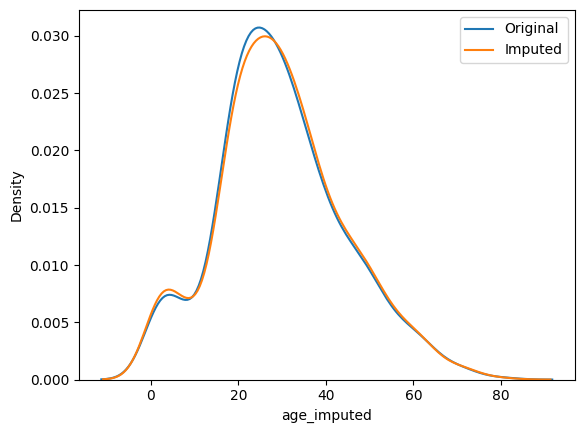

In [14]:
sns.distplot(df['Age'],label='Original',hist=False)
sns.distplot(df['age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [16]:
print('Original variable variance: ', df['Age'].var())
print('Variance after random imputation: ', df['age_imputed'].var())

Original variable variance:  211.01912474630802
Variance after random imputation:  214.89384956985586


In [18]:
df[['Fare', 'Age', 'age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2469.436846,73.849030,59.978816
Age,73.849030,211.019125,211.019125
age_imputed,59.978816,211.019125,214.893850


Distribution or variance ka value sahi hai lekin co-rellation me bohot jyada changes hai

In [21]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day37-handling-missing-categorical-data/train.csv"
data = pd.read_csv(url,usecols=['FireplaceQu','GarageQual','SalePrice'])
data.columns


Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [22]:
X = data
y = data['SalePrice']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [25]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [26]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
517,TA,TA,265000,TA,TA
1385,NaN,TA,125500,TA,NaN
1210,TA,TA,189000,TA,TA
233,NaN,TA,128200,TA,NaN
536,NaN,TA,188000,TA,NaN


In [27]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'

In [28]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [29]:
temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [30]:

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.391096
TA,0.412439,0.334932
Fa,0.040917,0.033562
Po,0.027823,0.021233
Ex,0.024550,0.019178


C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

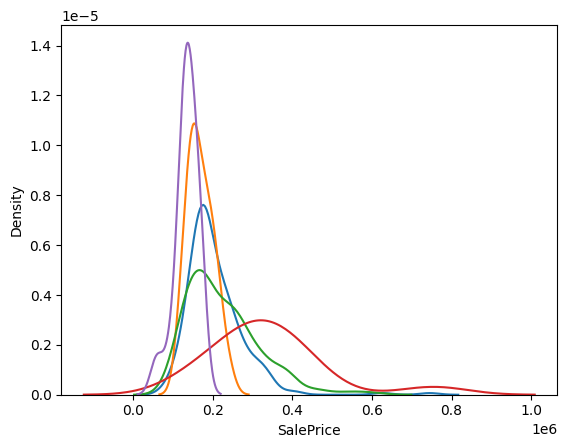

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\alisa\AppData\Local\Temp\ipykernel_6340\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

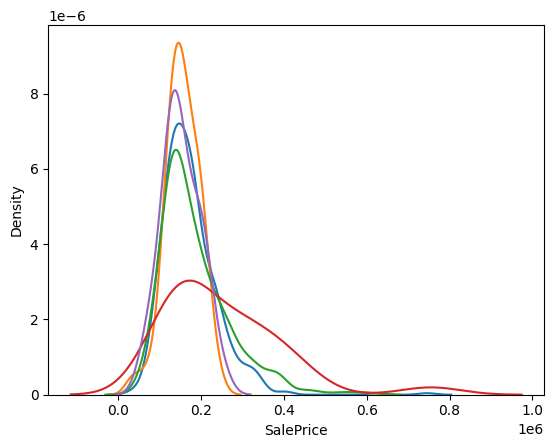

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

conclusion: "FireplaceQu_impute" ye cols me tum random imputation use nahi kar sakte , Q ki before and after ka distribution me bohot jyada difference hai